In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import nist, utils

# Example of load

In [3]:
nist.get_levels('Fe', 3)

<xarray.DataArray 'energy' (ilev: 49)>
array([   0.    ,   48.5997,   64.5656, 1149.64  , 1162.7   , 1167.6   ,
       1172.77  , 1174.5   , 1545.39  , 1550.91  , 1552.89  , 1554.7   ,
       1555.4   , 1555.7   , 1556.2   , 1726.54  , 1728.8   , 1729.8   ,
       1730.9   , 1731.5   , 1826.4   , 1827.    , 1826.9   , 1827.5   ,
       1885.6   , 1885.7   , 6600.4   , 6613.7   , 6616.7   , 6653.5   ,
       6661.9   , 6671.    , 6679.3   , 6685.    , 6676.4   , 6679.2   ,
       6702.7   , 6709.    , 6704.6   , 6722.4   , 6741.5   , 7785.    ,
       7807.3   , 7836.9   , 7845.8   , 7854.5   , 7854.6   , 7856.6   ,
       7881.9   ])
Coordinates:
    Configuration              (ilev) <U19 '1s2.2s' '1s2.2p' ... '1s.2p.3p'
    Configuration_uncertain    (ilev) bool False False False ... False False
    Term                       (ilev) <U7 '2S' '2P' '2P' '2S' ... '2D' '2D' '2S'
    Term_uncertain             (ilev) bool False False False ... False False
    J                          (il

In [4]:
levels = nist.get_levels('Li', 1)
lines = nist.fuse(levels, nist.get_lines('Li', 1))

In [5]:
lines

<xarray.Dataset>
Dimensions:                       (ilev: 148, ilev2: 148)
Coordinates:
    Configuration_uncertain       (ilev) bool False False False ... False False
    Term_uncertain                (ilev) bool False False False ... False False
    J_uncertain                   (ilev) bool False False False ... False False
    Level(eV)_uncertain           (ilev) bool False False False ... False False
    Uncertainty(eV)               (ilev) float64 2.5e-07 6e-07 ... 8e-07 8e-07
    Uncertainty(eV)_uncertain     (ilev) bool False False False ... False False
    Leadingpercentages            (ilev) <U19 '100' '100' '100' ... '100' '100'
    Leadingpercentages_uncertain  (ilev) bool False False False ... False False
    Reference                     (ilev) <U5 'Refer' 'L3620' ... 'L3620' 'L3620'
    Reference_uncertain           (ilev) bool True False False ... False False
    Level(eV)_is_theoretical      (ilev) bool False True True ... True True True
    Level(eV)_is_predicted      

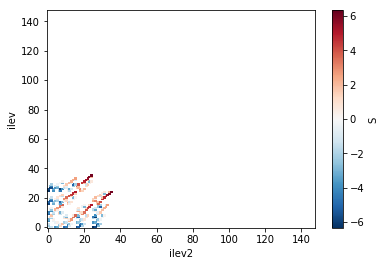

In [6]:
np.log(lines['S']).plot()

# Batch execution

In [7]:
import os

if not os.path.exists('data'):
    os.mkdir('data')

In [8]:
def download(element, overwrite=True):
    nele_all = utils.ATOMIC_SYMBOLS.index(element)
    
    if not os.path.exists('data/' + element):
        os.mkdir('data/' + element)
    
    for nele in range(1, nele_all + 1):
        filename = 'data/' + element + '/' + element + '_' + str(nele) + '.nc'
        if not overwrite and os.path.exists(filename):
            try:
                level = xr.open_dataarray(filename)
                print('skipping {} {}'.format(element, nele))
            except:
                print('downloading {} {}'.format(element, nele))
                level = nist.get_levels(element, nele)
                level.to_netcdf(filename)
        else:
            print('downloading {} {}'.format(element, nele))
            level = nist.get_levels(element, nele)
            level.to_netcdf(filename)
        
        try:
            filename = 'data/' + element + '/' + element + '_' + str(nele) + '_lines.nc'
            if not overwrite and os.path.exists(filename):
                try:
                    linses = xr.open_dataarray(filename)
                    print('skipping {} {}'.format(element, nele))
                except:
                    print('downloading {} {}'.format(element, nele))
                    lines = nist.get_lines(element, nele)
                    lines.to_netcdf(filename)
            else:
                print('downloading {} {}'.format(element, nele))
                lines = nist.get_lines(element, nele)
                lines.to_netcdf(filename)

        except nist.DataNotFoundError:
            print('data for {} {} not found'.format(element, nele))

## One element

In [9]:
download('F')

downloading F 1
downloading F 1
data for F 1 not found
downloading F 2
downloading F 2
downloading F 3
downloading F 3
downloading F 4
downloading F 4
downloading F 5
downloading F 5
downloading F 6
downloading F 6
downloading F 7
downloading F 7
downloading F 8
downloading F 8
downloading F 9
downloading F 9


## Many elements

In [10]:
for atom in utils.ATOMIC_SYMBOLS:
# for atom in utils.ATOMIC_SYMBOLS[38:0:-1]:
    download(atom, overwrite=True)

downloading H 1
downloading H 1
downloading He 1
downloading He 1
downloading He 2
downloading He 2
downloading Li 1
downloading Li 1
downloading Li 2
downloading Li 2
downloading Li 3
downloading Li 3
downloading Be 1
downloading Be 1
downloading Be 2
downloading Be 2
downloading Be 3
downloading Be 3
downloading Be 4
downloading Be 4
downloading B 1
downloading B 1
downloading B 2
downloading B 2
downloading B 3
downloading B 3
downloading B 4
downloading B 4
downloading B 5
downloading B 5
downloading C 1
downloading C 1
downloading C 2
downloading C 2
downloading C 3
downloading C 3
downloading C 4
downloading C 4
downloading C 5
downloading C 5
downloading C 6
downloading C 6
downloading N 1
downloading N 1
downloading N 2
downloading N 2
downloading N 3
downloading N 3
downloading N 4
downloading N 4
downloading N 5
downloading N 5
downloading N 6
downloading N 6
downloading N 7
downloading N 7
downloading O 1
downloading O 1
downloading O 2
downloading O 2
downloading O 3
downlo

downloading Sc 21
downloading Ti 1
downloading Ti 1
downloading Ti 2
downloading Ti 2
downloading Ti 3
downloading Ti 3
downloading Ti 4
downloading Ti 4
downloading Ti 5
downloading Ti 5
downloading Ti 6
downloading Ti 6
downloading Ti 7
downloading Ti 7
downloading Ti 8
downloading Ti 8
downloading Ti 9
downloading Ti 9
downloading Ti 10
downloading Ti 10
downloading Ti 11
downloading Ti 11
downloading Ti 12
downloading Ti 12
downloading Ti 13
downloading Ti 13
downloading Ti 14
downloading Ti 14
downloading Ti 15
downloading Ti 15
downloading Ti 16
downloading Ti 16
downloading Ti 17
downloading Ti 17
downloading Ti 18
downloading Ti 18
downloading Ti 19
downloading Ti 19
downloading Ti 20
downloading Ti 20
downloading Ti 21
downloading Ti 21
downloading Ti 22
downloading Ti 22
downloading V 1
downloading V 1
downloading V 2
downloading V 2
downloading V 3
downloading V 3
downloading V 4
downloading V 4
downloading V 5
downloading V 5
downloading V 6
downloading V 6
downloading V 7


downloading Zn 15
data for Zn 15 not found
downloading Zn 16
downloading Zn 16
data for Zn 16 not found
downloading Zn 17
downloading Zn 17
data for Zn 17 not found
downloading Zn 18
downloading Zn 18
data for Zn 18 not found
downloading Zn 19
downloading Zn 19
data for Zn 19 not found
downloading Zn 20
downloading Zn 20
data for Zn 20 not found
downloading Zn 21
downloading Zn 21
data for Zn 21 not found
downloading Zn 22
downloading Zn 22
data for Zn 22 not found
downloading Zn 23
downloading Zn 23
data for Zn 23 not found
downloading Zn 24
downloading Zn 24
data for Zn 24 not found
downloading Zn 25
downloading Zn 25
data for Zn 25 not found
downloading Zn 26
downloading Zn 26
data for Zn 26 not found
downloading Zn 27
downloading Zn 27
downloading Zn 28
downloading Zn 28
downloading Zn 29
downloading Zn 29
downloading Zn 30
downloading Zn 30
downloading Ga 1
downloading Ga 1
downloading Ga 2
downloading Ga 2
downloading Ga 3
downloading Ga 3
downloading Ga 4
downloading Ga 4
data f

downloading Br 9
data for Br 9 not found
downloading Br 10
downloading Br 10
data for Br 10 not found
downloading Br 11
downloading Br 11
data for Br 11 not found
downloading Br 12
downloading Br 12
data for Br 12 not found
downloading Br 13
downloading Br 13
data for Br 13 not found
downloading Br 14
downloading Br 14
data for Br 14 not found
downloading Br 15
downloading Br 15
data for Br 15 not found
downloading Br 16
downloading Br 16
data for Br 16 not found
downloading Br 17
downloading Br 17
data for Br 17 not found
downloading Br 18
downloading Br 18
data for Br 18 not found
downloading Br 19
downloading Br 19
data for Br 19 not found
downloading Br 20
downloading Br 20
data for Br 20 not found
downloading Br 21
downloading Br 21
data for Br 21 not found
downloading Br 22
downloading Br 22
data for Br 22 not found
downloading Br 23
downloading Br 23
data for Br 23 not found
downloading Br 24
downloading Br 24
data for Br 24 not found
downloading Br 25
downloading Br 25
data for

downloading Zr 5
data for Zr 5 not found
downloading Zr 6
downloading Zr 6
data for Zr 6 not found
downloading Zr 7
downloading Zr 7
data for Zr 7 not found
downloading Zr 8
downloading Zr 8
data for Zr 8 not found
downloading Zr 9
downloading Zr 9
data for Zr 9 not found
downloading Zr 10
downloading Zr 10
data for Zr 10 not found
downloading Zr 11
downloading Zr 11
data for Zr 11 not found
downloading Zr 12
downloading Zr 12
data for Zr 12 not found
downloading Zr 13
downloading Zr 13
data for Zr 13 not found
downloading Zr 14
downloading Zr 14
data for Zr 14 not found
downloading Zr 15
downloading Zr 15
data for Zr 15 not found
downloading Zr 16
downloading Zr 16
data for Zr 16 not found
downloading Zr 17
downloading Zr 17
data for Zr 17 not found
downloading Zr 18
downloading Zr 18
data for Zr 18 not found
downloading Zr 19
downloading Zr 19
data for Zr 19 not found
downloading Zr 20
downloading Zr 20
data for Zr 20 not found
downloading Zr 21
downloading Zr 21
data for Zr 21 not f

data for Tc 37 not found
downloading Tc 38
downloading Tc 38
data for Tc 38 not found
downloading Tc 39
downloading Tc 39
data for Tc 39 not found
downloading Tc 40
downloading Tc 40
data for Tc 40 not found
downloading Tc 41
downloading Tc 41
data for Tc 41 not found
downloading Tc 42
downloading Tc 42
downloading Tc 43
downloading Tc 43
downloading Ru 1
downloading Ru 1
data for Ru 1 not found
downloading Ru 2
downloading Ru 2
data for Ru 2 not found
downloading Ru 3
downloading Ru 3
data for Ru 3 not found
downloading Ru 4
downloading Ru 4
data for Ru 4 not found
downloading Ru 5
downloading Ru 5
data for Ru 5 not found
downloading Ru 6
downloading Ru 6
data for Ru 6 not found
downloading Ru 7
downloading Ru 7
data for Ru 7 not found
downloading Ru 8
downloading Ru 8
data for Ru 8 not found
downloading Ru 9
downloading Ru 9
data for Ru 9 not found
downloading Ru 10
downloading Ru 10
data for Ru 10 not found
downloading Ru 11
downloading Ru 11
data for Ru 11 not found
downloading Ru 

downloading Pd 45
downloading Pd 45
downloading Pd 46
downloading Pd 46
downloading Ag 1
downloading Ag 1
data for Ag 1 not found
downloading Ag 2
downloading Ag 2
data for Ag 2 not found
downloading Ag 3
downloading Ag 3
data for Ag 3 not found
downloading Ag 4
downloading Ag 4
data for Ag 4 not found
downloading Ag 5
downloading Ag 5
data for Ag 5 not found
downloading Ag 6
downloading Ag 6
data for Ag 6 not found
downloading Ag 7
downloading Ag 7
data for Ag 7 not found
downloading Ag 8
downloading Ag 8
data for Ag 8 not found
downloading Ag 9
downloading Ag 9
data for Ag 9 not found
downloading Ag 10
downloading Ag 10
data for Ag 10 not found
downloading Ag 11
downloading Ag 11
data for Ag 11 not found
downloading Ag 12
downloading Ag 12
data for Ag 12 not found
downloading Ag 13
downloading Ag 13
data for Ag 13 not found
downloading Ag 14
downloading Ag 14
data for Ag 14 not found
downloading Ag 15
downloading Ag 15
data for Ag 15 not found
downloading Ag 16
downloading Ag 16
data

data for In 43 not found
downloading In 44
downloading In 44
data for In 44 not found
downloading In 45
downloading In 45
downloading In 46
downloading In 46
downloading In 47
downloading In 47
downloading In 48
downloading In 48
downloading In 49
downloading In 49
downloading Sn 1
downloading Sn 1
data for Sn 1 not found
downloading Sn 2
downloading Sn 2
data for Sn 2 not found
downloading Sn 3
downloading Sn 3
data for Sn 3 not found
downloading Sn 4
downloading Sn 4
data for Sn 4 not found
downloading Sn 5
downloading Sn 5
data for Sn 5 not found
downloading Sn 6
downloading Sn 6
data for Sn 6 not found
downloading Sn 7
downloading Sn 7
data for Sn 7 not found
downloading Sn 8
downloading Sn 8
data for Sn 8 not found
downloading Sn 9
downloading Sn 9
data for Sn 9 not found
downloading Sn 10
downloading Sn 10
data for Sn 10 not found
downloading Sn 11
downloading Sn 11
data for Sn 11 not found
downloading Sn 12
downloading Sn 12
data for Sn 12 not found
downloading Sn 13
downloading

data for Te 35 not found
downloading Te 36
downloading Te 36
data for Te 36 not found
downloading Te 37
downloading Te 37
data for Te 37 not found
downloading Te 38
downloading Te 38
data for Te 38 not found
downloading Te 39
downloading Te 39
data for Te 39 not found
downloading Te 40
downloading Te 40
data for Te 40 not found
downloading Te 41
downloading Te 41
data for Te 41 not found
downloading Te 42
downloading Te 42
data for Te 42 not found
downloading Te 43
downloading Te 43
data for Te 43 not found
downloading Te 44
downloading Te 44
data for Te 44 not found
downloading Te 45
downloading Te 45
data for Te 45 not found
downloading Te 46
downloading Te 46
data for Te 46 not found
downloading Te 47
downloading Te 47
data for Te 47 not found
downloading Te 48
downloading Te 48
data for Te 48 not found
downloading Te 49
downloading Te 49
data for Te 49 not found
downloading Te 50
downloading Te 50
data for Te 50 not found
downloading Te 51
downloading Te 51
downloading Te 52
downlo

downloading Cs 38
downloading Cs 38
data for Cs 38 not found
downloading Cs 39
downloading Cs 39
data for Cs 39 not found
downloading Cs 40
downloading Cs 40
data for Cs 40 not found
downloading Cs 41
downloading Cs 41
data for Cs 41 not found
downloading Cs 42
downloading Cs 42
data for Cs 42 not found
downloading Cs 43
downloading Cs 43
data for Cs 43 not found
downloading Cs 44
downloading Cs 44
data for Cs 44 not found
downloading Cs 45
downloading Cs 45
downloading Cs 46
downloading Cs 46
downloading Cs 47
downloading Cs 47
downloading Cs 48
downloading Cs 48
downloading Cs 49
downloading Cs 49
downloading Cs 50
downloading Cs 50
downloading Cs 51
downloading Cs 51
downloading Cs 52
downloading Cs 52
downloading Cs 53
downloading Cs 53
downloading Cs 54
downloading Cs 54
downloading Cs 55
downloading Cs 55
downloading Ba 1
downloading Ba 1
downloading Ba 2
downloading Ba 2
downloading Ba 3
downloading Ba 3
downloading Ba 4
downloading Ba 4
downloading Ba 5
downloading Ba 5
downloa

downloading Ce 31
data for Ce 31 not found
downloading Ce 32
downloading Ce 32
data for Ce 32 not found
downloading Ce 33
downloading Ce 33
data for Ce 33 not found
downloading Ce 34
downloading Ce 34
data for Ce 34 not found
downloading Ce 35
downloading Ce 35
data for Ce 35 not found
downloading Ce 36
downloading Ce 36
data for Ce 36 not found
downloading Ce 37
downloading Ce 37
data for Ce 37 not found
downloading Ce 38
downloading Ce 38
data for Ce 38 not found
downloading Ce 39
downloading Ce 39
data for Ce 39 not found
downloading Ce 40
downloading Ce 40
data for Ce 40 not found
downloading Ce 41
downloading Ce 41
data for Ce 41 not found
downloading Ce 42
downloading Ce 42
data for Ce 42 not found
downloading Ce 43
downloading Ce 43
data for Ce 43 not found
downloading Ce 44
downloading Ce 44
data for Ce 44 not found
downloading Ce 45
downloading Ce 45
data for Ce 45 not found
downloading Ce 46
downloading Ce 46
data for Ce 46 not found
downloading Ce 47
downloading Ce 47
data f

data for Nd 53 not found
downloading Nd 54
downloading Nd 54
data for Nd 54 not found
downloading Nd 55
downloading Nd 55
data for Nd 55 not found
downloading Nd 56
downloading Nd 56
data for Nd 56 not found
downloading Nd 57
downloading Nd 57
data for Nd 57 not found
downloading Nd 58
downloading Nd 58
data for Nd 58 not found
downloading Nd 59
downloading Nd 59
downloading Nd 60
downloading Nd 60
downloading Pm 1
downloading Pm 1
data for Pm 1 not found
downloading Pm 2
downloading Pm 2
data for Pm 2 not found
downloading Pm 3
downloading Pm 3
data for Pm 3 not found
downloading Pm 4
downloading Pm 4
data for Pm 4 not found
downloading Pm 5
downloading Pm 5
data for Pm 5 not found
downloading Pm 6
downloading Pm 6
data for Pm 6 not found
downloading Pm 7
downloading Pm 7
data for Pm 7 not found
downloading Pm 8
downloading Pm 8
data for Pm 8 not found
downloading Pm 9
downloading Pm 9
data for Pm 9 not found
downloading Pm 10
downloading Pm 10
data for Pm 10 not found
downloading Pm 

downloading Eu 9
data for Eu 9 not found
downloading Eu 10
downloading Eu 10
data for Eu 10 not found
downloading Eu 11
downloading Eu 11
data for Eu 11 not found
downloading Eu 12
downloading Eu 12
data for Eu 12 not found
downloading Eu 13
downloading Eu 13
data for Eu 13 not found
downloading Eu 14
downloading Eu 14
data for Eu 14 not found
downloading Eu 15
downloading Eu 15
data for Eu 15 not found
downloading Eu 16
downloading Eu 16
data for Eu 16 not found
downloading Eu 17
downloading Eu 17
data for Eu 17 not found
downloading Eu 18
downloading Eu 18
data for Eu 18 not found
downloading Eu 19
downloading Eu 19
data for Eu 19 not found
downloading Eu 20
downloading Eu 20
data for Eu 20 not found
downloading Eu 21
downloading Eu 21
data for Eu 21 not found
downloading Eu 22
downloading Eu 22
data for Eu 22 not found
downloading Eu 23
downloading Eu 23
data for Eu 23 not found
downloading Eu 24
downloading Eu 24
data for Eu 24 not found
downloading Eu 25
downloading Eu 25
data for

data for Tb 20 not found
downloading Tb 21
downloading Tb 21
data for Tb 21 not found
downloading Tb 22
downloading Tb 22
data for Tb 22 not found
downloading Tb 23
downloading Tb 23
data for Tb 23 not found
downloading Tb 24
downloading Tb 24
data for Tb 24 not found
downloading Tb 25
downloading Tb 25
data for Tb 25 not found
downloading Tb 26
downloading Tb 26
data for Tb 26 not found
downloading Tb 27
downloading Tb 27
data for Tb 27 not found
downloading Tb 28
downloading Tb 28
data for Tb 28 not found
downloading Tb 29
downloading Tb 29
data for Tb 29 not found
downloading Tb 30
downloading Tb 30
data for Tb 30 not found
downloading Tb 31
downloading Tb 31
data for Tb 31 not found
downloading Tb 32
downloading Tb 32
data for Tb 32 not found
downloading Tb 33
downloading Tb 33
data for Tb 33 not found
downloading Tb 34
downloading Tb 34
data for Tb 34 not found
downloading Tb 35
downloading Tb 35
data for Tb 35 not found
downloading Tb 36
downloading Tb 36
data for Tb 36 not found

downloading Ho 27
data for Ho 27 not found
downloading Ho 28
downloading Ho 28
data for Ho 28 not found
downloading Ho 29
downloading Ho 29
data for Ho 29 not found
downloading Ho 30
downloading Ho 30
data for Ho 30 not found
downloading Ho 31
downloading Ho 31
data for Ho 31 not found
downloading Ho 32
downloading Ho 32
data for Ho 32 not found
downloading Ho 33
downloading Ho 33
data for Ho 33 not found
downloading Ho 34
downloading Ho 34
data for Ho 34 not found
downloading Ho 35
downloading Ho 35
data for Ho 35 not found
downloading Ho 36
downloading Ho 36
data for Ho 36 not found
downloading Ho 37
downloading Ho 37
data for Ho 37 not found
downloading Ho 38
downloading Ho 38
data for Ho 38 not found
downloading Ho 39
downloading Ho 39
data for Ho 39 not found
downloading Ho 40
downloading Ho 40
data for Ho 40 not found
downloading Ho 41
downloading Ho 41
data for Ho 41 not found
downloading Ho 42
downloading Ho 42
data for Ho 42 not found
downloading Ho 43
downloading Ho 43
data f

data for Tm 29 not found
downloading Tm 30
downloading Tm 30
data for Tm 30 not found
downloading Tm 31
downloading Tm 31
data for Tm 31 not found
downloading Tm 32
downloading Tm 32
data for Tm 32 not found
downloading Tm 33
downloading Tm 33
data for Tm 33 not found
downloading Tm 34
downloading Tm 34
data for Tm 34 not found
downloading Tm 35
downloading Tm 35
data for Tm 35 not found
downloading Tm 36
downloading Tm 36
data for Tm 36 not found
downloading Tm 37
downloading Tm 37
data for Tm 37 not found
downloading Tm 38
downloading Tm 38
data for Tm 38 not found
downloading Tm 39
downloading Tm 39
data for Tm 39 not found
downloading Tm 40
downloading Tm 40
data for Tm 40 not found
downloading Tm 41
downloading Tm 41
data for Tm 41 not found
downloading Tm 42
downloading Tm 42
data for Tm 42 not found
downloading Tm 43
downloading Tm 43
data for Tm 43 not found
downloading Tm 44
downloading Tm 44
data for Tm 44 not found
downloading Tm 45
downloading Tm 45
data for Tm 45 not found

downloading Lu 29
data for Lu 29 not found
downloading Lu 30
downloading Lu 30
data for Lu 30 not found
downloading Lu 31
downloading Lu 31
data for Lu 31 not found
downloading Lu 32
downloading Lu 32
data for Lu 32 not found
downloading Lu 33
downloading Lu 33
data for Lu 33 not found
downloading Lu 34
downloading Lu 34
data for Lu 34 not found
downloading Lu 35
downloading Lu 35
data for Lu 35 not found
downloading Lu 36
downloading Lu 36
data for Lu 36 not found
downloading Lu 37
downloading Lu 37
data for Lu 37 not found
downloading Lu 38
downloading Lu 38
data for Lu 38 not found
downloading Lu 39
downloading Lu 39
data for Lu 39 not found
downloading Lu 40
downloading Lu 40
data for Lu 40 not found
downloading Lu 41
downloading Lu 41
data for Lu 41 not found
downloading Lu 42
downloading Lu 42
data for Lu 42 not found
downloading Lu 43
downloading Lu 43
data for Lu 43 not found
downloading Lu 44
downloading Lu 44
data for Lu 44 not found
downloading Lu 45
downloading Lu 45
data f

data for Ta 25 not found
downloading Ta 26
downloading Ta 26
data for Ta 26 not found
downloading Ta 27
downloading Ta 27
data for Ta 27 not found
downloading Ta 28
downloading Ta 28
data for Ta 28 not found
downloading Ta 29
downloading Ta 29
data for Ta 29 not found
downloading Ta 30
downloading Ta 30
data for Ta 30 not found
downloading Ta 31
downloading Ta 31
data for Ta 31 not found
downloading Ta 32
downloading Ta 32
data for Ta 32 not found
downloading Ta 33
downloading Ta 33
data for Ta 33 not found
downloading Ta 34
downloading Ta 34
data for Ta 34 not found
downloading Ta 35
downloading Ta 35
data for Ta 35 not found
downloading Ta 36
downloading Ta 36
data for Ta 36 not found
downloading Ta 37
downloading Ta 37
data for Ta 37 not found
downloading Ta 38
downloading Ta 38
data for Ta 38 not found
downloading Ta 39
downloading Ta 39
data for Ta 39 not found
downloading Ta 40
downloading Ta 40
data for Ta 40 not found
downloading Ta 41
downloading Ta 41
data for Ta 41 not found

downloading Re 41
data for Re 41 not found
downloading Re 42
downloading Re 42
data for Re 42 not found
downloading Re 43
downloading Re 43
data for Re 43 not found
downloading Re 44
downloading Re 44
data for Re 44 not found
downloading Re 45
downloading Re 45
data for Re 45 not found
downloading Re 46
downloading Re 46
data for Re 46 not found
downloading Re 47
downloading Re 47
data for Re 47 not found
downloading Re 48
downloading Re 48
data for Re 48 not found
downloading Re 49
downloading Re 49
data for Re 49 not found
downloading Re 50
downloading Re 50
data for Re 50 not found
downloading Re 51
downloading Re 51
data for Re 51 not found
downloading Re 52
downloading Re 52
data for Re 52 not found
downloading Re 53
downloading Re 53
data for Re 53 not found
downloading Re 54
downloading Re 54
data for Re 54 not found
downloading Re 55
downloading Re 55
data for Re 55 not found
downloading Re 56
downloading Re 56
data for Re 56 not found
downloading Re 57
downloading Re 57
data f

downloading Ir 29
data for Ir 29 not found
downloading Ir 30
downloading Ir 30
data for Ir 30 not found
downloading Ir 31
downloading Ir 31
data for Ir 31 not found
downloading Ir 32
downloading Ir 32
data for Ir 32 not found
downloading Ir 33
downloading Ir 33
data for Ir 33 not found
downloading Ir 34
downloading Ir 34
data for Ir 34 not found
downloading Ir 35
downloading Ir 35
data for Ir 35 not found
downloading Ir 36
downloading Ir 36
data for Ir 36 not found
downloading Ir 37
downloading Ir 37
data for Ir 37 not found
downloading Ir 38
downloading Ir 38
data for Ir 38 not found
downloading Ir 39
downloading Ir 39
data for Ir 39 not found
downloading Ir 40
downloading Ir 40
data for Ir 40 not found
downloading Ir 41
downloading Ir 41
data for Ir 41 not found
downloading Ir 42
downloading Ir 42
data for Ir 42 not found
downloading Ir 43
downloading Ir 43
data for Ir 43 not found
downloading Ir 44
downloading Ir 44
data for Ir 44 not found
downloading Ir 45
downloading Ir 45
data f

data for Au 13 not found
downloading Au 14
downloading Au 14
data for Au 14 not found
downloading Au 15
downloading Au 15
data for Au 15 not found
downloading Au 16
downloading Au 16
data for Au 16 not found
downloading Au 17
downloading Au 17
data for Au 17 not found
downloading Au 18
downloading Au 18
data for Au 18 not found
downloading Au 19
downloading Au 19
data for Au 19 not found
downloading Au 20
downloading Au 20
data for Au 20 not found
downloading Au 21
downloading Au 21
data for Au 21 not found
downloading Au 22
downloading Au 22
data for Au 22 not found
downloading Au 23
downloading Au 23
data for Au 23 not found
downloading Au 24
downloading Au 24
data for Au 24 not found
downloading Au 25
downloading Au 25
data for Au 25 not found
downloading Au 26
downloading Au 26
data for Au 26 not found
downloading Au 27
downloading Au 27
data for Au 27 not found
downloading Au 28
downloading Au 28
data for Au 28 not found
downloading Au 29
downloading Au 29
data for Au 29 not found

data for Hg 70 not found
downloading Hg 71
downloading Hg 71
data for Hg 71 not found
downloading Hg 72
downloading Hg 72
data for Hg 72 not found
downloading Hg 73
downloading Hg 73
data for Hg 73 not found
downloading Hg 74
downloading Hg 74
data for Hg 74 not found
downloading Hg 75
downloading Hg 75
data for Hg 75 not found
downloading Hg 76
downloading Hg 76
data for Hg 76 not found
downloading Hg 77
downloading Hg 77
data for Hg 77 not found
downloading Hg 78
downloading Hg 78
downloading Hg 79
downloading Hg 79
downloading Hg 80
downloading Hg 80
downloading Tl 1
downloading Tl 1
data for Tl 1 not found
downloading Tl 2
downloading Tl 2
data for Tl 2 not found
downloading Tl 3
downloading Tl 3
data for Tl 3 not found
downloading Tl 4
downloading Tl 4
data for Tl 4 not found
downloading Tl 5
downloading Tl 5
data for Tl 5 not found
downloading Tl 6
downloading Tl 6
data for Tl 6 not found
downloading Tl 7
downloading Tl 7
data for Tl 7 not found
downloading Tl 8
downloading Tl 8


downloading Pb 48
data for Pb 48 not found
downloading Pb 49
downloading Pb 49
data for Pb 49 not found
downloading Pb 50
downloading Pb 50
data for Pb 50 not found
downloading Pb 51
downloading Pb 51
data for Pb 51 not found
downloading Pb 52
downloading Pb 52
data for Pb 52 not found
downloading Pb 53
downloading Pb 53
data for Pb 53 not found
downloading Pb 54
downloading Pb 54
data for Pb 54 not found
downloading Pb 55
downloading Pb 55
data for Pb 55 not found
downloading Pb 56
downloading Pb 56
data for Pb 56 not found
downloading Pb 57
downloading Pb 57
data for Pb 57 not found
downloading Pb 58
downloading Pb 58
data for Pb 58 not found
downloading Pb 59
downloading Pb 59
data for Pb 59 not found
downloading Pb 60
downloading Pb 60
data for Pb 60 not found
downloading Pb 61
downloading Pb 61
data for Pb 61 not found
downloading Pb 62
downloading Pb 62
data for Pb 62 not found
downloading Pb 63
downloading Pb 63
data for Pb 63 not found
downloading Pb 64
downloading Pb 64
data f

data for Po 22 not found
downloading Po 23
downloading Po 23
data for Po 23 not found
downloading Po 24
downloading Po 24
data for Po 24 not found
downloading Po 25
downloading Po 25
data for Po 25 not found
downloading Po 26
downloading Po 26
data for Po 26 not found
downloading Po 27
downloading Po 27
data for Po 27 not found
downloading Po 28
downloading Po 28
data for Po 28 not found
downloading Po 29
downloading Po 29
data for Po 29 not found
downloading Po 30
downloading Po 30
data for Po 30 not found
downloading Po 31
downloading Po 31
data for Po 31 not found
downloading Po 32
downloading Po 32
data for Po 32 not found
downloading Po 33
downloading Po 33
data for Po 33 not found
downloading Po 34
downloading Po 34
data for Po 34 not found
downloading Po 35
downloading Po 35
data for Po 35 not found
downloading Po 36
downloading Po 36
data for Po 36 not found
downloading Po 37
downloading Po 37
data for Po 37 not found
downloading Po 38
downloading Po 38
data for Po 38 not found

downloading At 74
data for At 74 not found
downloading At 75
downloading At 75
data for At 75 not found
downloading At 76
downloading At 76
data for At 76 not found
downloading At 77
downloading At 77
data for At 77 not found
downloading At 78
downloading At 78
data for At 78 not found
downloading At 79
downloading At 79
data for At 79 not found
downloading At 80
downloading At 80
data for At 80 not found
downloading At 81
downloading At 81
data for At 81 not found
downloading At 82
downloading At 82
data for At 82 not found
downloading At 83
downloading At 83
data for At 83 not found
downloading At 84
downloading At 84
data for At 84 not found
downloading At 85
downloading At 85
downloading Rn 1
downloading Rn 1
data for Rn 1 not found
downloading Rn 2
downloading Rn 2
data for Rn 2 not found
downloading Rn 3
downloading Rn 3
data for Rn 3 not found
downloading Rn 4
downloading Rn 4
data for Rn 4 not found
downloading Rn 5
downloading Rn 5
data for Rn 5 not found
downloading Rn 6
down